# Decision Tree

### Importing Libraries

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset loading and exploratory data analysis

Loading Dataset

In [5]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head() # Preview the dataset
diabetes_df.shape # Number of instances and variables

(768, 9)

Renaming Colunms

In [6]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
diabetes_df.columns = col_names # Rename column names

Summary of Dataset

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 Frequency distributions of values in variables

In [8]:
for col in col_names:
  print(diabetes_df[col].value_counts())

pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
bp
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
skin
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40  

Exploring target variable

In [13]:
diabetes_df['label'].value_counts()

,count
label,
0,500
1,268


Checking missing values in variables

In [11]:
diabetes_df.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


### Defining feature vector and target variable

In [16]:
# This separates inputs (x) from outputs (y). This is essential step in supervised learning.
X = diabetes_df.drop(['label'], axis=1) # All colunms exceot  'label'
y = diabetes_df['label'] # Target: has diabetes or not

### Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75% training and 25% test
# Here random_state=1, ensures the same split every time
X_train.shape, X_test.shape # Shapes of X_train and X_test

((576, 8), (192, 8))

### Feature engineering: encoding categorical variables

In [ ]:
X_train.dtypes # Check data types in X_train

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=X.columns.tolist())
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Since decision tree can handle the numeric input, this step ensures any non-numeric colunms (if any) are encoded as numbers.
# But in this dataset, all the features are numeric, so this is more precautionary.

### Building decision tree classifier with the Gini index criterion

In [18]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

### Predicting results for the test set

In [19]:
y_pred = clf_gini.predict(X_test)

### Evaluating model

In [20]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


### Confusion Matrix

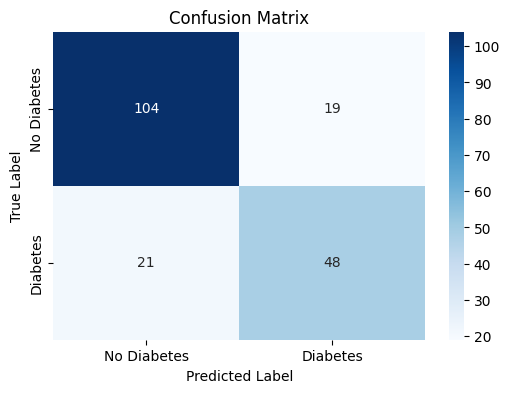

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Optimizing Decision Tree Performance

In [25]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best')

### Vitualize the decision tree

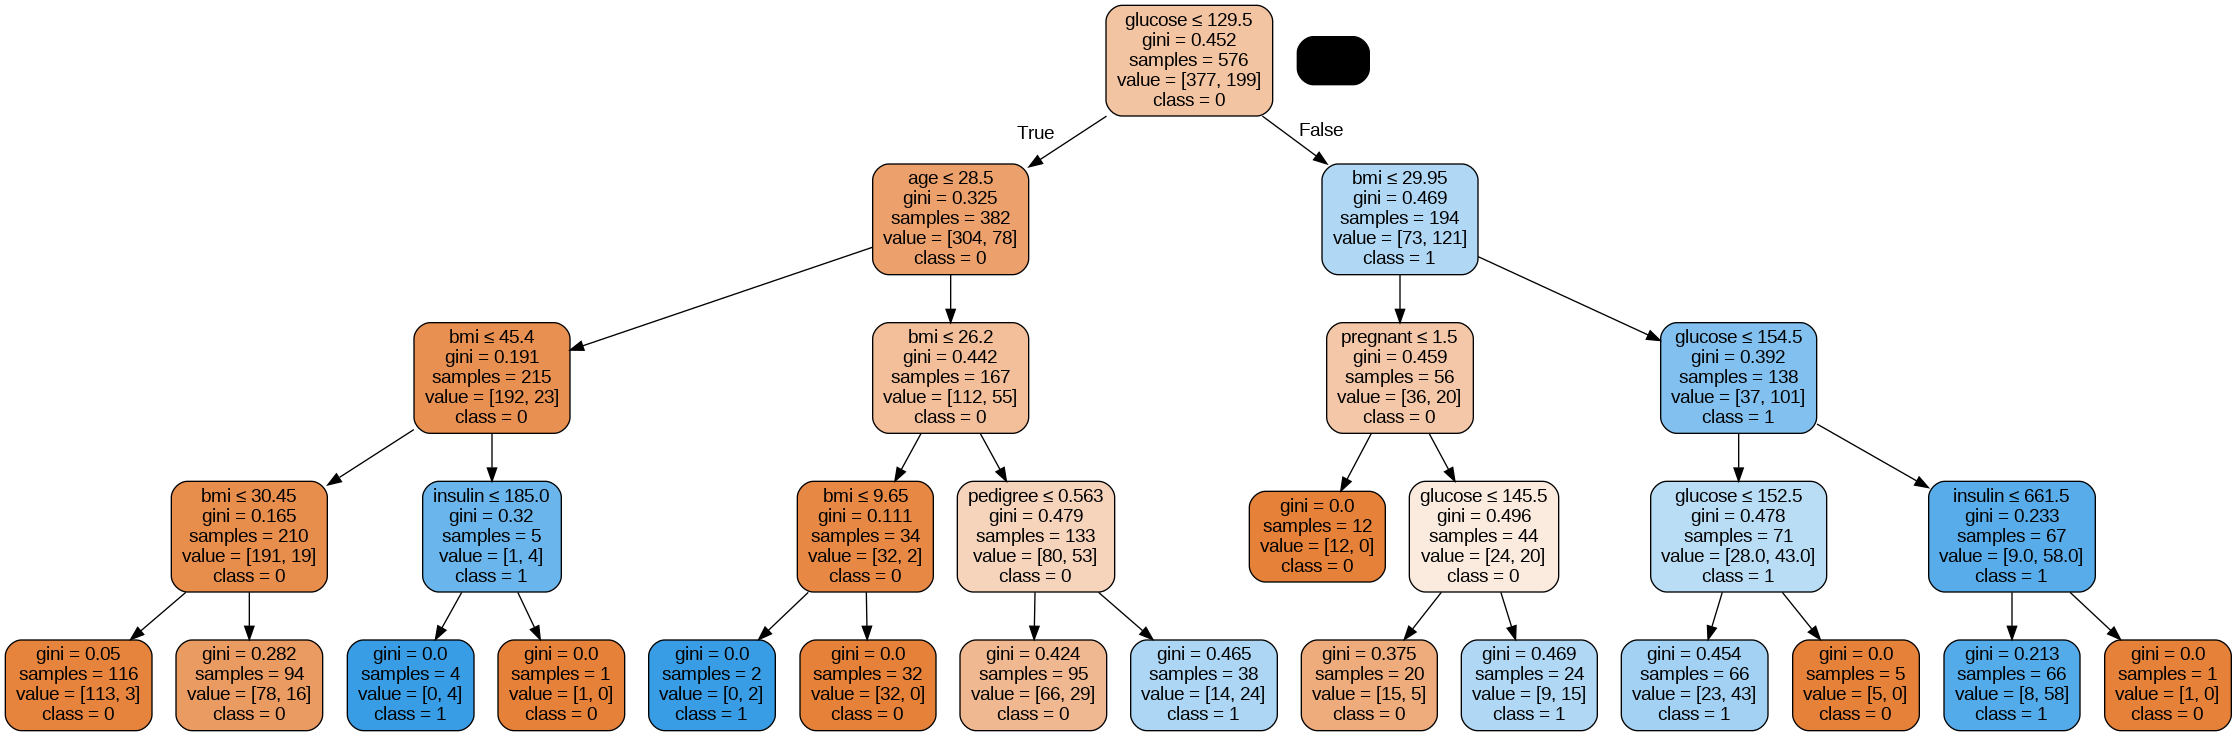

In [26]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini,
    out_file=dot_data,
    filled=True,              # Fill colors in nodes
    rounded=True,             # Round node corners
    special_characters=True,  # Allow symbols
    feature_names=X.columns,  # Use feature names on splits
    class_names=['0','1'])    # Target labels

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Precision - Among the predictions made for a given class, how many are correct?
# Recall - Out of all the actual instances of a class, how many were correctly predicted?
# F1-Score - Harmonic mean of precision and Recall
# Support - Actual number of occurances of the class in your test dataset

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.72      0.70      0.71        69

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192



# kNN

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}
kNN Accuracy: 0.6770833333333334
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       123
           1       0.56      0.51      0.53        69

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.67       192



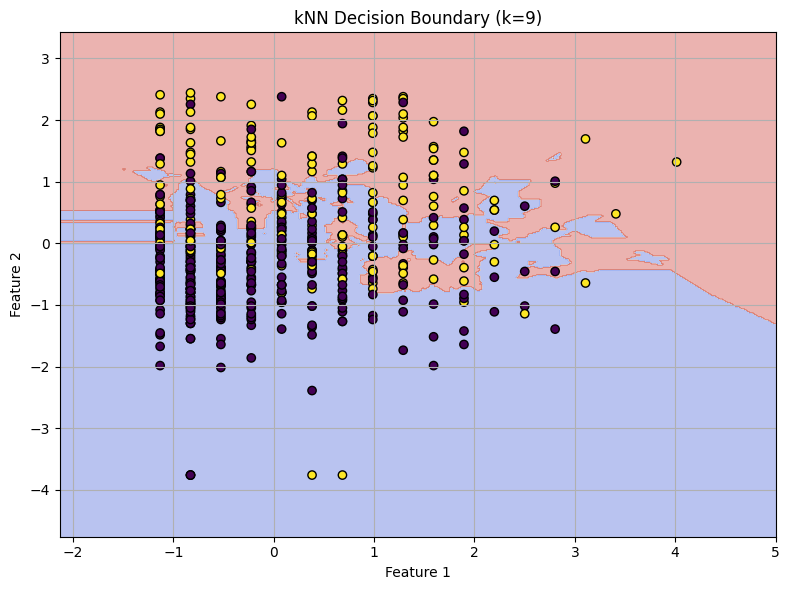

In [29]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load dataset (Pima Indians Diabetes dataset)
df = pd.read_csv("diabetes.csv")

# Step 3: Define features and target
X = df.drop('Outcome', axis=1)  # Rename 'label' to 'Outcome' if needed
y = df['Outcome']

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define parameter grid and perform GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Step 7: Use best model and predict
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Step 8: Print evaluation metrics
print("Best parameters:", grid.best_params_)
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Step 9: Visualization with only first two features
X2_train = X_train_scaled[:, :2]  # First two features
X2_test = X_test_scaled[:, :2]

knn2 = KNeighborsClassifier(
    n_neighbors=grid.best_params_['n_neighbors'],
    metric=grid.best_params_['metric']
)
knn2.fit(X2_train, y_train)

# Create meshgrid
h = 0.02
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict over meshgrid
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y_train, edgecolor='k', marker='o')
plt.title(f'kNN Decision Boundary (k={grid.best_params_["n_neighbors"]})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()